In [5]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import cmath
import math

cwd = os.getcwd()
sys.path.append(cwd+"/../handy_functions")

from concat_pickles import get_outputs,get_outputsSweep,print_df
from scipy.stats import mannwhitneyu, normaltest, zscore
from statannotations.Annotator import Annotator

pal = sns.husl_palette(8)
mtfef_pal = ['forestgreen','mediumpurple']

data_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/runs'
fig_folder = '/Users/kendranoneman/Projects/mayo/NeuralDecoding/figures/grc'

In [ ]:
def rtoZ(r2):
    z = 0.5 * math.log((1+r2)/(1-r2))
    return z

In [ ]:
conditions = ["bn0"]
column_names = ['sess','repeat','outer_fold','nMT','nFEF','model','mean_R2','mean_rho','mean_R2_null','mean_rho_null']
df = get_outputs(data_folder+'/all_decoders',conditions,column_names)
df.head(1)

# FIGURE 2

In [ ]:
plt.rcParams.update({'font.size': 12})

sess = 29
wf = (df.loc[(df['model']==0) & (df['sess']==sess)]['mean_R2']).values
wc = (df.loc[(df['model']==1) & (df['sess']==sess)]['mean_R2']).values
xgb = (df.loc[(df['model']==2) & (df['sess']==sess)]['mean_R2']).values
svr = (df.loc[(df['model']==3) & (df['sess']==sess)]['mean_R2']).values
dnn = (df.loc[(df['model']==4) & (df['sess']==sess)]['mean_R2']).values
rnn = (df.loc[(df['model']==5) & (df['sess']==sess)]['mean_R2']).values
gru = (df.loc[(df['model']==6) & (df['sess']==sess)]['mean_R2']).values
lstm = (df.loc[(df['model']==7) & (df['sess']==sess)]['mean_R2']).values

n=10
means=([np.mean(wf),np.mean(wc),np.mean(xgb),np.mean(svr),np.mean(dnn),np.mean(rnn),np.mean(gru),np.mean(lstm)])
err=([np.std(wf)*np.sqrt(1./n+1./(n-1)),np.std(wc)*np.sqrt(1./n+1./(n-1)),np.std(xgb)*np.sqrt(1./n+1./(n-1)),np.std(svr)*np.sqrt(1./n+1./(n-1)),np.std(dnn)*np.sqrt(1./n+1./(n-1)),np.std(rnn)*np.sqrt(1./n+1./(n-1)),np.std(gru)*np.sqrt(1./n+1./(n-1)),np.std(lstm)*np.sqrt(1./n+1./(n-1))])


fig, ax = plt.subplots(1,1,figsize=(8,4))

ind = np.arange(len(err)) #X values for plotting
for pos, y, yerr, color in zip(ind, means, err, pal): #Loop through methods and plot error bars
    ax.errorbar(pos, y, yerr, lw=3, capsize=5, capthick=2, color=color)

    #Remove x tick labels
    ax.set_xticklabels(['','wf','wc','xgb','svr','dnn','rnn','gru','lstm'], rotation=0)

    #Remove right and top boundaries, and make ticks inward
    ax.tick_params(direction='in',bottom=0)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    #Plot individual R2 values for each fold as an 'x'
    scatter_x=np.reshape(np.transpose(np.ones((10,1))*range(8)),(80,1)) #Get x values for plotting (first 10 will have an x value of 0, second 10 will have an x value of 1, etc)
    scatter_y=np.concatenate((wf,wc,xgb,svr,dnn,rnn,gru,lstm),axis=0) #Y values for plotting
    colors_list=[] #Create a list of the colors that should be used when plotting each 'x'
    for i in scatter_x.astype(int).reshape((1,-1))[0]:
        colors_list.append(pal[i])
        
    ax.scatter(scatter_x,scatter_y,c=colors_list,marker='x',alpha=0.05)
fig.savefig(fig_folder+'/model_R2.png', dpi=600, bbox_inches='tight')

In [ ]:
with open(data_folder+'/all_decoders/fold06-m6-eyetrace.pickle', 'rb') as f:
    y_test,y_test_predicted = pickle.load(f)
    
#plt.rcParams.update({'font.size': 14})
x = np.arange(0, 31*50, 50) - 500
print(x)
fig, axes = plt.subplots(2,2,figsize=(5,3))
fig.tight_layout()

start_end = [1272,1303]
axes[0,0].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[0,0].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[0,0].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[0,0].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[0,0].set_ylim(-12.5, 14.5)
axes[0,0].set_yticks([-10,0,10])
axes[0,0].set_xticks([])

start_end = [87,118] 
axes[0,1].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='$X_{true}$')
axes[0,1].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='$X_{decoded}$')
axes[0,1].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='$Y_{true}$')
axes[0,1].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='$Y_{decoded}$')
axes[0,1].set_ylim(-1.25, 12.5)
axes[0,1].set_yticks([0,10])
axes[0,1].set_xticks([])

start_end = [1047,1078] 
axes[1,0].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[1,0].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[1,0].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[1,0].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[1,0].set_ylim(-12.5,2)
axes[1,0].set_yticks([-10,0])
axes[1,0].set_xticks([-500,0,500,1000])

start_end = [184,215] 
axes[1,1].plot(x,y_test[start_end[0]:start_end[1],0], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes[1,1].plot(x,y_test_predicted[start_end[0]:start_end[1],0], color=pal[6], linewidth=2, label='predicted (horizontal)')
axes[1,1].plot(x,y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linestyle='dashed', linewidth=2, label='true (vertical)')
axes[1,1].plot(x,y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linestyle='dashed', linewidth=2, label='predicted (vertical)')
axes[1,1].set_ylim(-14.75, 14)
axes[1,1].set_yticks([-10,0,10])
axes[1,1].set_xticks([-500,0,500,1000])

plt.subplots_adjust(wspace=0.25, hspace=0.05)

axes[0,1].legend(loc='lower center', bbox_to_anchor=(-0.12, 0.95),
          fancybox=False, shadow=False, ncol=4, fontsize="10",frameon=False)

#fig.savefig(fig_folder+'/model_4traces.png', dpi=600, bbox_inches='tight') 

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(3,3))

start_end = [1272,1303]
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [87,118] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [1047,1078] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

start_end = [184,215] 
axes.plot(y_test[start_end[0]:start_end[1],0],y_test[start_end[0]:start_end[1],1], color=(0.3,0.3,0.3), linewidth=2, label='true (horizontal)')
axes.plot(y_test_predicted[start_end[0]:start_end[1],0],y_test_predicted[start_end[0]:start_end[1],1], color=pal[6], linewidth=2, label='predicted (horizontal)')

#fig.savefig(fig_folder+'/model_stacktraces.png', dpi=600, bbox_inches='tight') 

# Figure 3

In [2]:
conditions = ["m00"]
column_names = ['sess','repeat','outer_fold','nMT','nFEF','model','mean_R2','mean_rho','mean_R2_null','mean_rho_null','time_elapsed','neurons']

df2 = get_outputsSweep(data_folder+'/neuron_sweep',conditions,column_names)
df2.head(1)

,sess,repeat,outer_fold,nMT,nFEF,model,mean_R2,mean_rho,mean_R2_null,mean_rho_null,time_elapsed,neurons
0,16,0,0,0,2,0,-0.000323,-0.001406,0,0,3.389,"[20, 23]"


[Text(39.27777777777779, 0.5, '')]

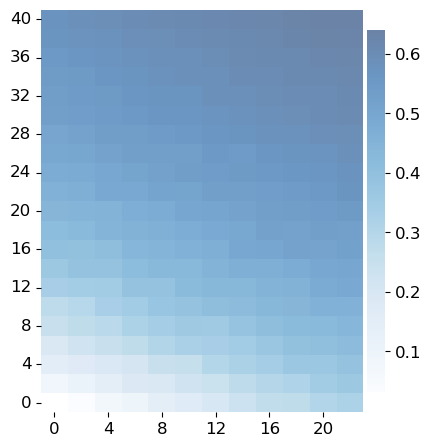

In [3]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1,1, figsize=(5,5))
fig.tight_layout(pad=2)

df = df2.loc[df2['sess']==29] #16,19,20,24 
df = df[['nMT','nFEF','mean_R2']]
df_m = df.groupby(['nFEF', 'nMT'])["mean_R2"].mean().reset_index(name="R2")
result = df_m.pivot(index='nFEF', columns='nMT', values='R2')

#YlGnBu

a = sns.heatmap(ax=ax,data=result,cmap="Blues", mask=result.isnull(), alpha=0.6, xticklabels=2,yticklabels=2, cbar_kws={'location':'right','ticks':[0.1,0.2,0.3,0.4,0.5,0.6],'orientation':'vertical','pad':0.01,"shrink":0.9})
a.invert_yaxis()
plt.yticks(rotation=0) 
a.set(xlabel=None)
a.set(ylabel=None)

#fig.savefig(fig_folder+'/r2_numNeurons-heatmap.png', dpi=300, bbox_inches='tight') 

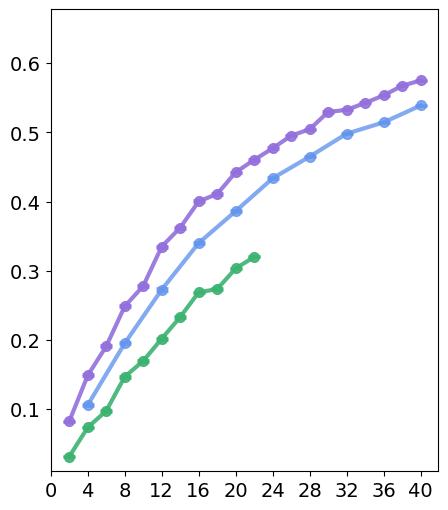

In [20]:
plt.rcParams.update({'font.size': 14})

df = df2[['nMT','nFEF','mean_R2','sess','repeat','outer_fold']]
df = df.loc[df2['sess']==29]

conditions = [
    (df['nFEF'] == 0),
    (df['nMT'] == 0),
    (df['nMT'] == df['nFEF']),
    (df['nMT'] > 0) & (df['nFEF'] > 0) & (df['nMT'] != df['nFEF'])
    ]

values = ['mt only', 'fef only', 'mt=fef','mt+fef']
df['condition'] = np.select(conditions, values)
df['num_neurons'] = df.loc[:,['nMT','nFEF']].sum(axis=1)
df = df.loc[(df['num_neurons']<=np.array([df['nMT'].max(),df['nFEF'].max()]).max())]

df_mn = df.groupby(['nFEF', 'nMT', 'num_neurons'])["mean_R2"].mean().reset_index(name="mR2")
df_sd = df.groupby(['nFEF', 'nMT', 'num_neurons'])["mean_R2"].sem().reset_index(name="sR2")

fef_mn = df_mn.loc[df_mn['nMT']==0]['mR2'].values
fef_sd = (df_sd.loc[df_sd['nMT']==0]['sR2'].values)*np.sqrt(1./10+1./(10-1))
mt_mn = df_mn.loc[df_mn['nFEF']==0]['mR2'].values
mt_sd = (df_sd.loc[df_sd['nFEF']==0]['sR2'].values)*np.sqrt(1./10+1./(10-1))
mf_mn = df_mn.loc[df_mn['nFEF']==df_mn['nMT']]['mR2'].values
mf_sd = (df_sd.loc[df_sd['nFEF']==df_mn['nMT']]['sR2'].values)*np.sqrt(1./10+1./(10-1))

fig, ax = plt.subplots(1,1,figsize=(5,6))

ax.errorbar(np.arange(2,2+(len(fef_mn)*2),2), fef_mn, fef_sd, lw=3, capsize=4, marker='o', alpha=0.9, markersize=7, capthick=2, color='mediumpurple', zorder=2)
ax.errorbar(np.arange(2,2+(len(mt_mn)*2),2), mt_mn, mt_sd, lw=3, capsize=4, marker='o', alpha=0.9, markersize=7, capthick=2, color='mediumseagreen',zorder=3)
ax.errorbar(np.arange(4,4+(len(mf_mn)*4),4), mf_mn, mf_sd, lw=3, capsize=4, marker='o', alpha=0.8, markersize=7, capthick=2,  color='cornflowerblue',zorder=1)

ax.set_xticks(np.arange(0,41,4))
ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_ylim(0.01,0.678)

fig.savefig(fig_folder+'/r2_numNeurons-onesess.png', dpi=600, bbox_inches='tight') 

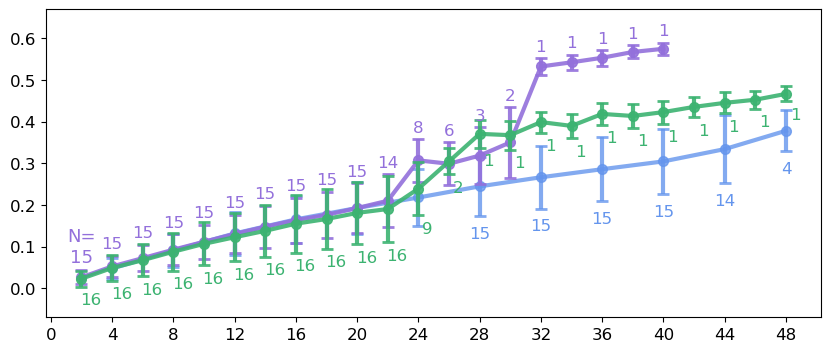

In [21]:
plt.rcParams.update({'font.size': 12})

df = df2[['nMT','nFEF','mean_R2','sess','repeat','outer_fold']]
df = df.loc[df['sess']!=16]
df['zscore_R2'] =  df.groupby(['sess','outer_fold']).mean_R2.transform(lambda x : zscore(x,ddof=1))

conditions = [
    (df['nFEF'] == 0),
    (df['nMT'] == 0),
    (df['nMT'] == df['nFEF']),
    (df['nMT'] > 0) & (df['nFEF'] > 0) & (df['nMT'] != df['nFEF'])
    ]

values = ['mt only', 'fef only', 'mt=fef','mt+fef']
df['condition'] = np.select(conditions, values)
df['num_neurons'] = df.loc[:,['nMT','nFEF']].sum(axis=1)
#df = df.loc[(df['num_neurons']<=np.array([df['nMT'].max(),df['nFEF'].max()]).max())]

df_mn = df.groupby(['nFEF', 'nMT', 'num_neurons'])["mean_R2"].mean().reset_index(name="mR2")
df_sd = df.groupby(['nFEF', 'nMT', 'num_neurons'])["mean_R2"].std().reset_index(name="sR2")

fef_mn = df_mn.loc[df_mn['nMT']==0]['mR2'].values
fef_sd = (df_sd.loc[df_sd['nMT']==0]['sR2'].values)*np.sqrt(1./10+1./(10-1))
mt_mn = df_mn.loc[df_mn['nFEF']==0]['mR2'].values
mt_sd = (df_sd.loc[df_sd['nFEF']==0]['sR2'].values)*np.sqrt(1./10+1./(10-1))
mf_mn = df_mn.loc[df_mn['nFEF']==df_mn['nMT']]['mR2'].values
mf_sd = (df_sd.loc[df_sd['nFEF']==df_mn['nMT']]['sR2'].values)*np.sqrt(1./10+1./(10-1))

fig, ax = plt.subplots(1,1,figsize=(10,4))

ax.errorbar(np.arange(2,2+(len(fef_mn)*2),2), fef_mn, fef_sd, lw=3, capsize=4, marker='o', markersize=7, capthick=2, alpha=0.9,color='mediumpurple', zorder=2)
ax.errorbar(np.arange(2,2+(len(mt_mn)*2),2), mt_mn, mt_sd, lw=3, capsize=4, marker='o', markersize=7, capthick=2, alpha=0.9,color='mediumseagreen',zorder=3)
ax.errorbar(np.arange(4,4+(len(mf_mn)*4),4), mf_mn, mf_sd, lw=3, capsize=4, marker='o', markersize=7, capthick=2, alpha=0.8, color='cornflowerblue',zorder=1)

ax.set_xticks(np.arange(0,51,4))
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6])
ax.set_ylim(-0.07,0.67)

df_c = df.groupby(['condition','num_neurons','sess']).mean().reset_index()
df_c = df_c.groupby(['condition','num_neurons']).count().reset_index()
df_cnts = [df_c.loc[df_c['condition'] == 'fef only']['repeat'].values,df_c.loc[df_c['condition'] == 'mt only']['repeat'].values,df_c.loc[df_c['condition'] == 'mt=fef']['repeat'].values]

fef_ct = df_c.loc[df_c['condition']=='fef only']['sess'].values
mt_ct = df_c.loc[df_c['condition']=='mt only']['sess'].values
mf_ct = df_c.loc[df_c['condition']=='mt=fef']['sess'].values

for i, size in enumerate(fef_ct):
    x = np.arange(2,2+(len(fef_mn)*2),2)
    if i==0:
        plt.text(x[i], fef_mn[i] + fef_sd[i] + 0.01, 'N=\n'+str(size), ha='center', va='bottom', color='mediumpurple', fontsize=13)
    else:
        plt.text(x[i], fef_mn[i] + fef_sd[i] + 0.01, str(size), ha='center', va='bottom', color='mediumpurple')

for i, size in enumerate(mt_ct):
    x = np.arange(2,2+(len(mt_mn)*2),2)
    plt.text(x[i]+0.6, mt_mn[i] - mt_sd[i] - 0.05, str(size), ha='center', va='bottom', color='mediumseagreen')
    
for i, size in enumerate(mf_ct):
    x = np.arange(4,4+(len(mf_mn)*4),4)
    if x[i]>25:
        plt.text(x[i], mf_mn[i] - mf_sd[i] - 0.06, str(size), ha='center', va='bottom', color='cornflowerblue')


fig.savefig(fig_folder+'/r2_numNeurons-allsess.png', dpi=600, bbox_inches='tight') 

# Figure 4

In [ ]:
conditions = ["m00"]
column_names = ['sess','outer_fold','nMT','nFEF','model','mean_R2','mean_rho','mean_R2_null','mean_rho_null','time_elapsed','neuron_dropped','mean_R2_    FULL','mean_rho_FULL','mean_R2_null_FULL','mean_rho_null_FULL']
df2 = get_outputsSweep(data_folder+'/neuron_dropping',conditions,column_names)
df2.head(1)

In [ ]:
plt.rcParams.update({'font.size': 12})

sess = 29
wf = (df.loc[(df['model']==0) & (df['sess']==sess)]['mean_R2']).values
wc = (df.loc[(df['model']==1) & (df['sess']==sess)]['mean_R2']).values
xgb = (df.loc[(df['model']==2) & (df['sess']==sess)]['mean_R2']).values
svr = (df.loc[(df['model']==3) & (df['sess']==sess)]['mean_R2']).values
dnn = (df.loc[(df['model']==4) & (df['sess']==sess)]['mean_R2']).values
rnn = (df.loc[(df['model']==5) & (df['sess']==sess)]['mean_R2']).values
gru = (df.loc[(df['model']==6) & (df['sess']==sess)]['mean_R2']).values
lstm = (df.loc[(df['model']==7) & (df['sess']==sess)]['mean_R2']).values

n=10
means=([np.mean(wf),np.mean(wc),np.mean(xgb),np.mean(svr),np.mean(dnn),np.mean(rnn),np.mean(gru),np.mean(lstm)])
err=([np.std(wf)*np.sqrt(1./n+1./(n-1)),np.std(wc)*np.sqrt(1./n+1./(n-1)),np.std(xgb)*np.sqrt(1./n+1./(n-1)),np.std(svr)*np.sqrt(1./n+1./(n-1)),np.std(dnn)*np.sqrt(1./n+1./(n-1)),np.std(rnn)*np.sqrt(1./n+1./(n-1)),np.std(gru)*np.sqrt(1./n+1./(n-1)),np.std(lstm)*np.sqrt(1./n+1./(n-1))])


fig, ax = plt.subplots(1,1,figsize=(8,4))

ind = np.arange(len(err)) #X values for plotting
for pos, y, yerr, color in zip(ind, means, err, pal): #Loop through methods and plot error bars
    ax.errorbar(pos, y, yerr, lw=3, capsize=5, capthick=2, color=color)

    #Remove x tick labels
    ax.set_xticklabels(['','wf','wc','xgb','svr','dnn','rnn','gru','lstm'], rotation=0)

    #Remove right and top boundaries, and make ticks inward
    ax.tick_params(direction='in',bottom=0)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    #Plot individual R2 values for each fold as an 'x'
    scatter_x=np.reshape(np.transpose(np.ones((10,1))*range(8)),(80,1)) #Get x values for plotting (first 10 will have an x value of 0, second 10 will have an x value of 1, etc)
    scatter_y=np.concatenate((wf,wc,xgb,svr,dnn,rnn,gru,lstm),axis=0) #Y values for plotting
    colors_list=[] #Create a list of the colors that should be used when plotting each 'x'
    for i in scatter_x.astype(int).reshape((1,-1))[0]:
        colors_list.append(pal[i])
        
    ax.scatter(scatter_x,scatter_y,c=colors_list,marker='x',alpha=0.05)
fig.savefig(fig_folder+'/model_R2.png', dpi=600, bbox_inches='tight')

In [ ]:
plt.rcParams.update({'font.size': 12})

fig, ax = plt.subplots(1,1, figsize=(10,3))
fig.tight_layout()

#'bad' sessions: 16
#'semi' sessions: 18,20,34,38
#'good' sessions: 19*,21,22,23*,24,25,27,28,29*,32,33,35
sess = 24
#units = pd.read_csv('/Users/kendranoneman/Projects/mayo/NeuralDecoding/datasets/units'+'/units-pa{}dir4A-pre500-post300'.format(sess)+'.csv')
#print_df(units)

dat = df2.loc[(df2['sess']==sess)].reset_index()
print((dat['mean_R2_    FULL'].values).mean())
mtfef_pal = []
for i in range(int(dat.iloc[0]['nFEF'])+1):
    if int(dat.iloc[0]['nFEF']) !=0:
        mtfef_pal.append('mediumpurple')
for i in range(int(dat.iloc[0]['nMT'])):
    mtfef_pal.append('mediumseagreen')
    
hue_plot_params = {'data':dat, 'x':'neuron_dropped', 'y':'mean_R2','palette':mtfef_pal}
a = sns.boxplot(ax=ax, **hue_plot_params,zorder=1)
a.axhline((dat['mean_R2_    FULL'].values).mean(),linestyle='--',color='black',zorder=0)
a.set_xticks(np.arange(0,len(mtfef_pal)+1,2))
a.set_xlim(-1,len(mtfef_pal))
a.set(xlabel=None)
a.set(ylabel=None)

#fig.savefig(fig_folder+'/neuron_dropping.png', dpi=600, bbox_inches='tight') 